# Laboratorio 5

# Análisis de Sentimientos

### Cristina Bautista 161260
### Andy Castillo 18040
### Marco Fuentes 18188
### Abril Palencia 18198

In [1]:
import numpy as np
import pandas as pd

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from nltk import sent_tokenize, word_tokenize, pos_tag
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import FreqDist
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Abril's
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Abril's
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv('GrammarandProductReviews.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    71044 non-null  object 
 1   brand                 71044 non-null  object 
 2   categories            71044 non-null  object 
 3   dateAdded             71044 non-null  object 
 4   dateUpdated           71044 non-null  object 
 5   ean                   39065 non-null  object 
 6   keys                  71044 non-null  object 
 7   manufacturer          70903 non-null  object 
 8   manufacturerNumber    70841 non-null  object 
 9   name                  71044 non-null  object 
 10  reviews.date          70977 non-null  object 
 11  reviews.dateAdded     71044 non-null  object 
 12  reviews.dateSeen      71044 non-null  object 
 13  reviews.didPurchase   32158 non-null  object 
 14  reviews.doRecommend   60429 non-null  object 
 15  reviews.id         

In [7]:
data = data[['brand','categories','manufacturer', 'name', 'reviews.didPurchase', 'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating', 'reviews.text', 'reviews.title', 'reviews.username']]

In [8]:
data['reviews.text'].head(20)

0     i love this album. it's very good. more to the...
1     Good flavor. This review was collected as part...
2                                          Good flavor.
3     I read through the reviews on here before look...
4     My husband bought this gel for us. The gel cau...
5     My boyfriend and I bought this to spice things...
6     Bought this earlier today and was excited to c...
7     I bought this product for my husband and I to ...
8     My husband and I bought this for some extra fu...
9     Got as a surprise for my husband there is noth...
10    tried it with my husband and felt no different...
11    Purchased this thinking it would have some sor...
12    Bought this to enhance our time a bit, did abs...
13    I bought this after really liking the his n he...
14    First time purchase of this type of product. M...
15    I bought this and tried this with my wife but ...
16    I bought this product to spice things up with ...
17    I bought this to try to spice things up, b

In [9]:
data.head()

,brand,categories,manufacturer,name,reviews.didPurchase,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.username
0,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),NaN,NaN,0.0,5,i love this album. it's very good. more to the...,Just Awesome,Joshua
1,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,True,NaN,NaN,5,Good flavor. This review was collected as part...,Good,Dorothy W
2,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,True,NaN,NaN,5,Good flavor.,Good,Dorothy W
3,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,False,False,NaN,1,I read through the reviews on here before look...,Disappointed,Rebecca
4,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,False,False,NaN,1,My husband bought this gel for us. The gel cau...,Irritation,Walker557


In [10]:
data['reviews.text'].head(20)

0     i love this album. it's very good. more to the...
1     Good flavor. This review was collected as part...
2                                          Good flavor.
3     I read through the reviews on here before look...
4     My husband bought this gel for us. The gel cau...
5     My boyfriend and I bought this to spice things...
6     Bought this earlier today and was excited to c...
7     I bought this product for my husband and I to ...
8     My husband and I bought this for some extra fu...
9     Got as a surprise for my husband there is noth...
10    tried it with my husband and felt no different...
11    Purchased this thinking it would have some sor...
12    Bought this to enhance our time a bit, did abs...
13    I bought this after really liking the his n he...
14    First time purchase of this type of product. M...
15    I bought this and tried this with my wife but ...
16    I bought this product to spice things up with ...
17    I bought this to try to spice things up, b

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                71044 non-null  object 
 1   categories           71044 non-null  object 
 2   manufacturer         70903 non-null  object 
 3   name                 71044 non-null  object 
 4   reviews.didPurchase  32158 non-null  object 
 5   reviews.doRecommend  60429 non-null  object 
 6   reviews.numHelpful   32508 non-null  float64
 7   reviews.rating       71044 non-null  int64  
 8   reviews.text         71008 non-null  object 
 9   reviews.title        70568 non-null  object 
 10  reviews.username     70948 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 6.0+ MB


In [12]:
data['brand'] = data['brand'].str.lower()
data['categories'] = data['categories'].str.lower()
data['manufacturer'] = data['manufacturer'].str.lower()
data['name'] = data['name'].str.lower()
data['reviews.text'] = data['reviews.text'].str.lower()
data['reviews.title'] = data['reviews.title'].str.lower()
data['reviews.username'] = data['reviews.username'].str.lower()

In [13]:
# Eliminar url
data['brand'] = data['brand'].str.replace(r'http\S+', ' ')
data['categories'] = data['categories'].str.replace(r'http\S+', ' ')
data['manufacturer'] = data['manufacturer'].str.replace(r'http\S+', ' ')
data['name'] = data['name'].str.replace(r'http\S+', ' ')
data['reviews.text'] = data['reviews.text'].str.replace(r'http\S+', ' ')
data['reviews.title'] = data['reviews.title'].str.replace(r'http\S+', ' ')
data['reviews.username'] = data['reviews.username'].str.replace(r'http\S+', ' ')

In [14]:
# Se elimino todo lo que no sean letras, como emojis, signos de puntuacion y numeros
data['brand'] = data['brand'].str.replace(r'[^A-Za-z\s]+', ' ')
data['categories'] = data['categories'].str.replace(r'[^A-Za-z]+', ' ')
data['manufacturer'] = data['manufacturer'].str.replace(r'[^A-Za-z]+', ' ')
data['name'] = data['name'].str.replace(r'[^A-Za-z\s]+', ' ')
data['reviews.text'] = data['reviews.text'].str.replace(r'[^A-Za-z]+', ' ')
data['reviews.title'] = data['reviews.title'].str.replace(r'[^A-Za-z]+', ' ')
data['reviews.username'] = data['reviews.username'].str.replace(r'[^A-Za-z]+', ' ')

In [15]:
# Se revisa que no tengan caracteres especiales las columnas deseadas
data.head()

,brand,categories,manufacturer,name,reviews.didPurchase,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.username
0,universal music,movies music books music r b movies tv movie b...,universal music group cash money,pink friday roman reloaded re up w dvd,NaN,NaN,0.0,5,i love this album it s very good more to the h...,just awesome,joshua
1,lundberg,food packaged foods snacks crackers snacks coo...,lundberg,lundberg organic cinnamon toast rice cakes,True,NaN,NaN,5,good flavor this review was collected as part ...,good,dorothy w
2,lundberg,food packaged foods snacks crackers snacks coo...,lundberg,lundberg organic cinnamon toast rice cakes,True,NaN,NaN,5,good flavor,good,dorothy w
3,k y,personal care medicine cabinet lubricant sperm...,k y,k y love sensuality pleasure gel,False,False,NaN,1,i read through the reviews on here before look...,disappointed,rebecca
4,k y,personal care medicine cabinet lubricant sperm...,k y,k y love sensuality pleasure gel,False,False,NaN,1,my husband bought this gel for us the gel caus...,irritation,walker


In [16]:
# Tokenize
tokenizer = RegexpTokenizer(r'\w+')

data['brand'] = data['brand'].apply(lambda x: tokenizer.tokenize(x))
data['categories'] = data['categories'].apply(lambda x: tokenizer.tokenize(x))
data['manufacturer'] = data['manufacturer'].apply(lambda x: tokenizer.tokenize(str(x)))
data['name'] = data['name'].apply(lambda x: tokenizer.tokenize(x))
data['reviews.text'] = data['reviews.text'].apply(lambda x: tokenizer.tokenize(str(x)))
data['reviews.title'] = data['reviews.title'].apply(lambda x: tokenizer.tokenize(str(x)))
data['reviews.username'] = data['reviews.username'].apply(lambda x: tokenizer.tokenize(str(x)))

In [17]:
# Stopwords
stopwords = stopwords.words('english')

In [18]:
data['reviews.text'] = data['reviews.text'].apply(lambda y: [w for w in y if w not in stopwords])
data['reviews.title'] = data['reviews.title'].apply(lambda y: [w for w in y if w not in stopwords])

In [19]:
# Se revisa que en reviews text y title no contengan stopwords
data.head()

,brand,categories,manufacturer,name,reviews.didPurchase,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.username
0,"[universal, music]","[movies, music, books, music, r, b, movies, tv...","[universal, music, group, cash, money]","[pink, friday, roman, reloaded, re, up, w, dvd]",NaN,NaN,0.0,5,"[love, album, good, hip, hop, side, current, p...",[awesome],[joshua]
1,[lundberg],"[food, packaged, foods, snacks, crackers, snac...",[lundberg],"[lundberg, organic, cinnamon, toast, rice, cakes]",True,NaN,NaN,5,"[good, flavor, review, collected, part, promot...",[good],"[dorothy, w]"
2,[lundberg],"[food, packaged, foods, snacks, crackers, snac...",[lundberg],"[lundberg, organic, cinnamon, toast, rice, cakes]",True,NaN,NaN,5,"[good, flavor]",[good],"[dorothy, w]"
3,"[k, y]","[personal, care, medicine, cabinet, lubricant,...","[k, y]","[k, y, love, sensuality, pleasure, gel]",False,False,NaN,1,"[read, reviews, looking, buying, one, couples,...",[disappointed],[rebecca]
4,"[k, y]","[personal, care, medicine, cabinet, lubricant,...","[k, y]","[k, y, love, sensuality, pleasure, gel]",False,False,NaN,1,"[husband, bought, gel, us, gel, caused, irrita...",[irritation],[walker]


In [20]:
stemmer = PorterStemmer()
def word_stemmer(data): 
    stem_text = " ".join([stemmer.stem(i) for i in data])
    return stem_text

In [21]:
data['reviews.text'].apply(lambda x: word_stemmer(x))

0        love album good hip hop side current pop sound...
1                   good flavor review collect part promot
2                                              good flavor
3        read review look buy one coupl lubric ultim di...
4        husband bought gel us gel caus irrit felt like...
                               ...                        
71039    deal dri eye sensit product eye clinic suggest...
71040              great stuff help keep contact moist day
71041                                          right price
71042    pleas scarf arriv multipl reason print color b...
71043    excel album make holiday better give nice chri...
Name: reviews.text, Length: 71044, dtype: object

In [22]:
data['reviews.text'] = data['reviews.text'].apply(lambda x: word_stemmer(x))
df = data['reviews.text'].str.split(expand=True).stack().value_counts()

<AxesSubplot:>

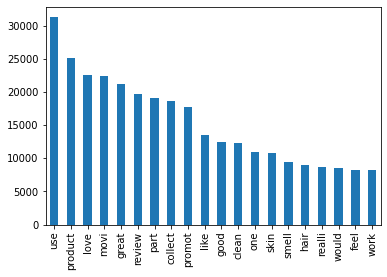

In [23]:
df[:20].plot.bar()

<AxesSubplot:>

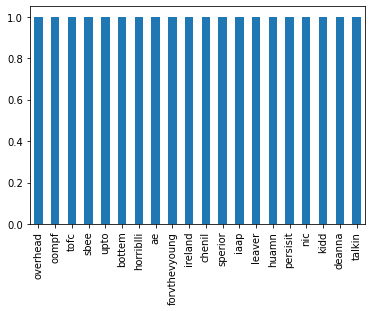

In [24]:
df[-20:].plot.bar()

In [25]:
all_text = data['reviews.text'].str.split(' ')
text_data = [" ".join(text) for text in all_text]
final_text = " ".join(text_data)

wordcloud_text = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(final_text)

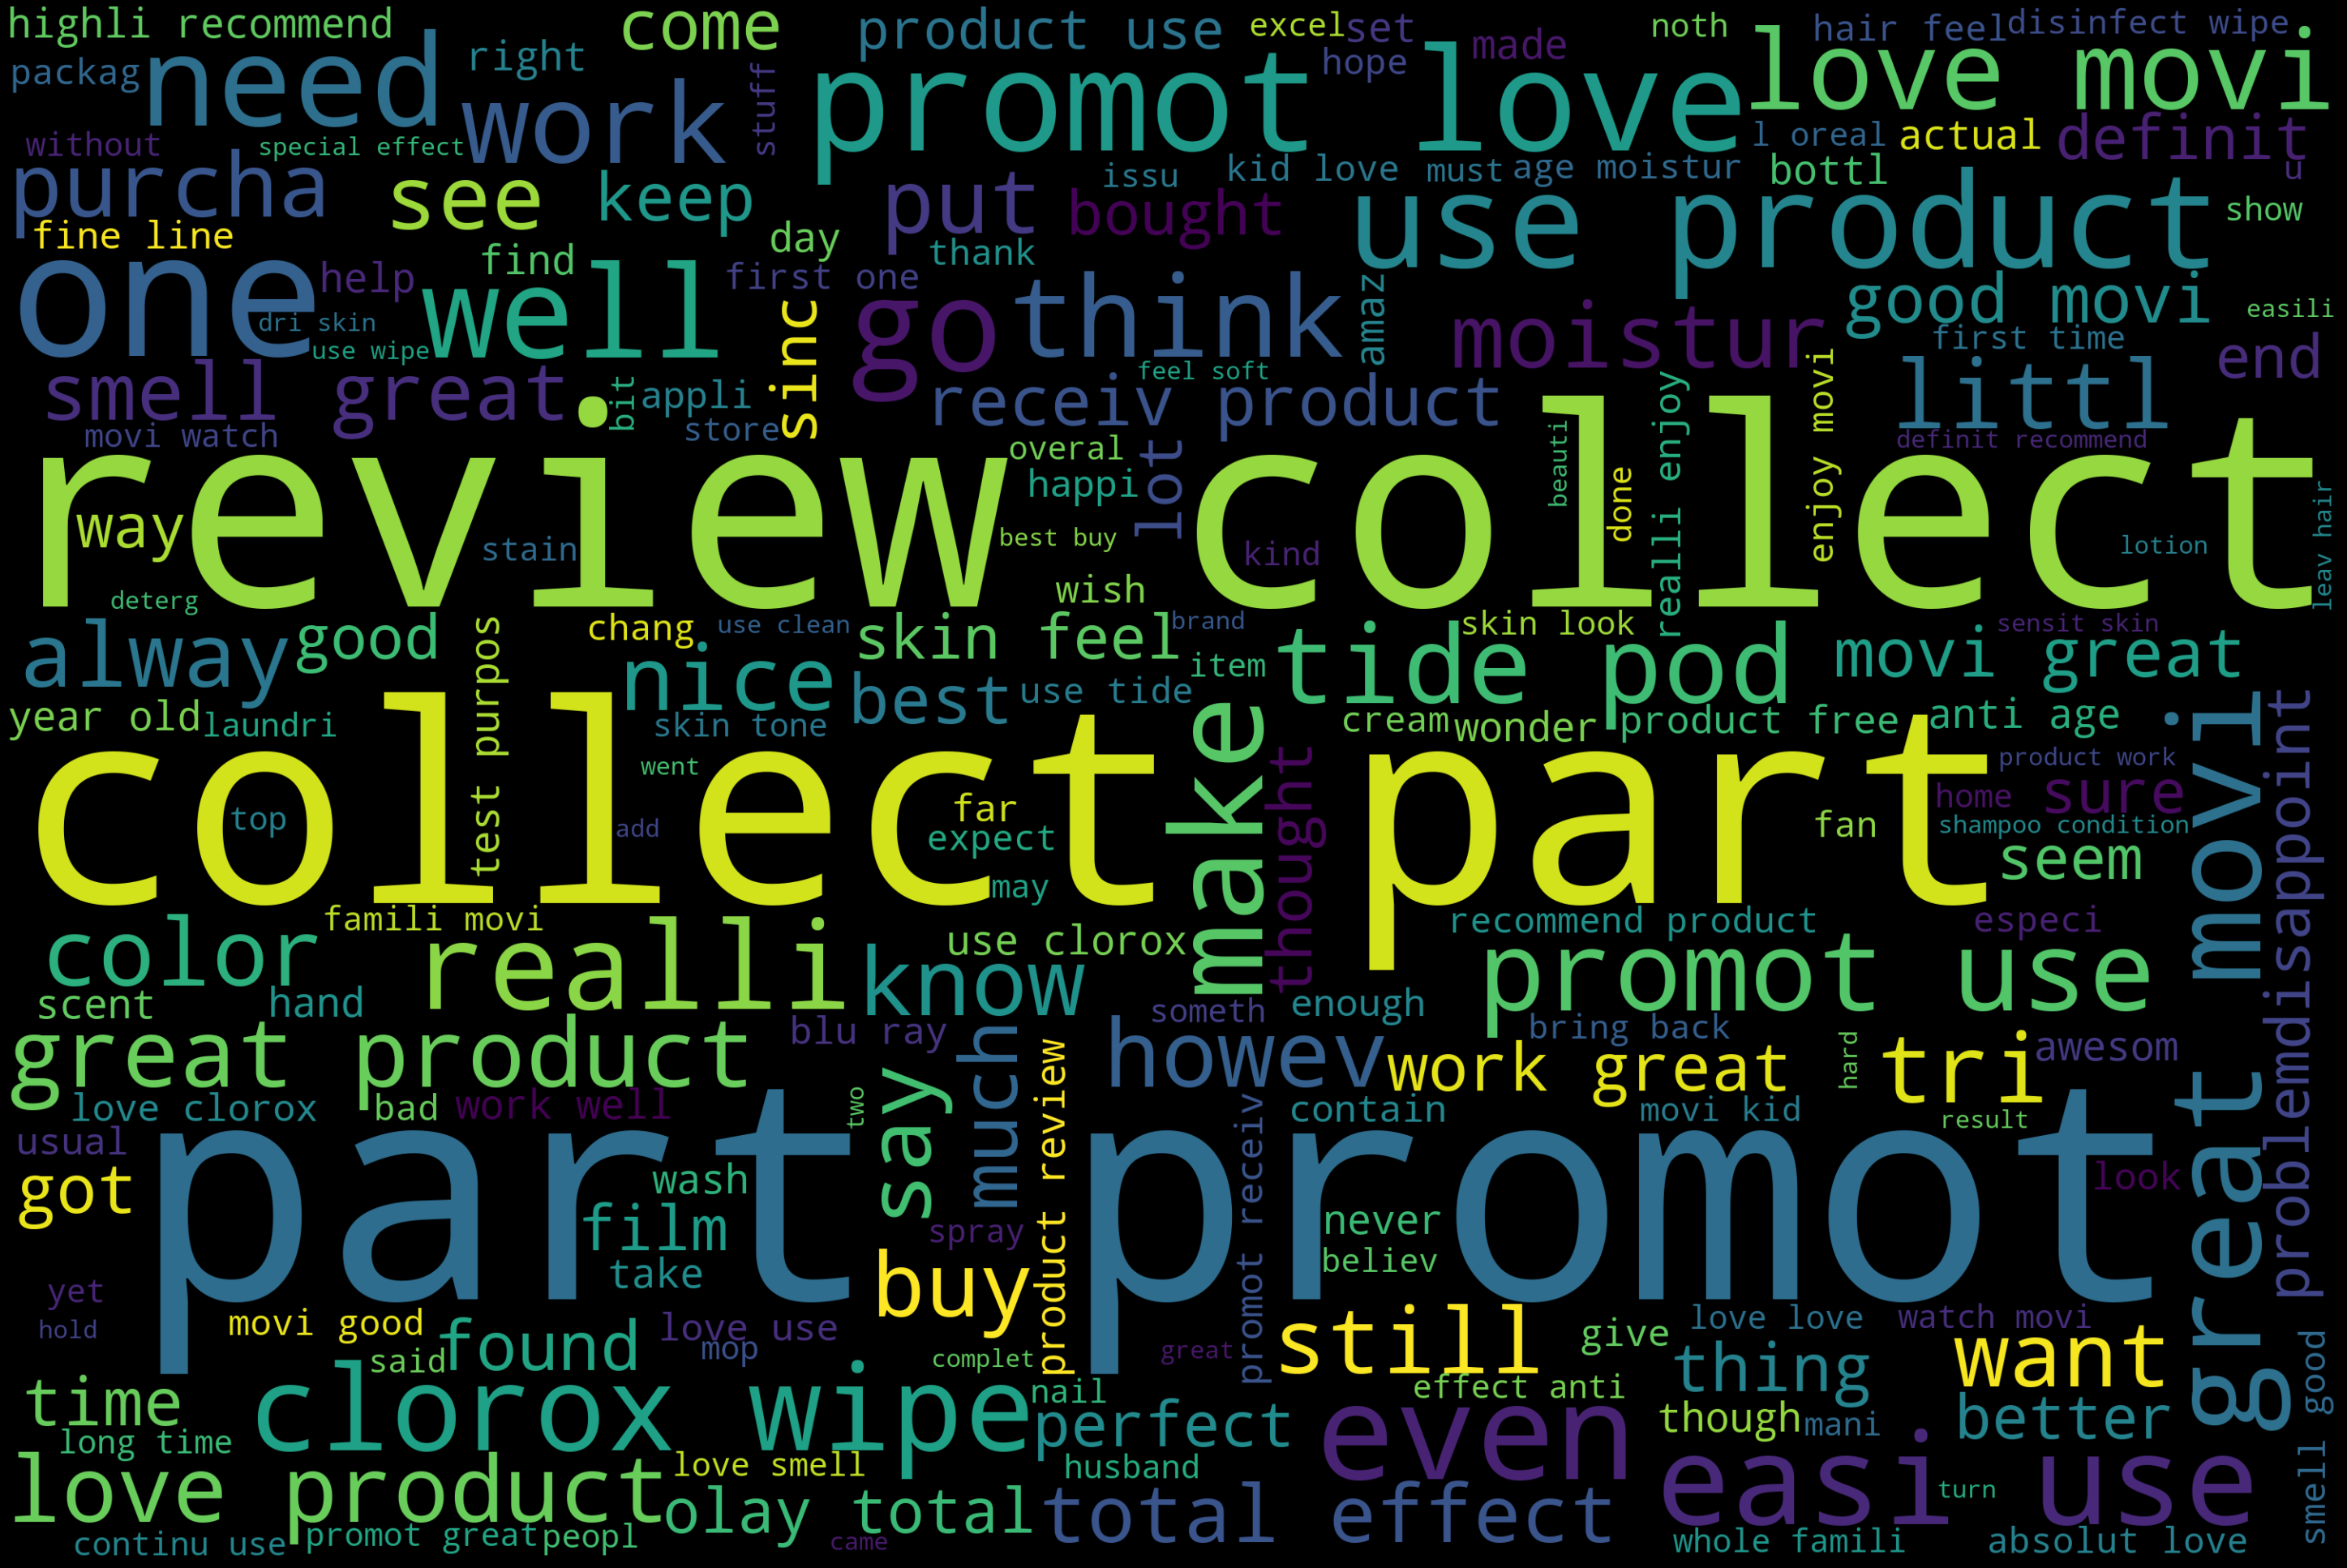

In [26]:
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud_text, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()